In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [6]:
data = sm.datasets.macrodata.load_pandas().data
data.index = pd.date_range(start = '01.01.1959', periods = len(data), freq='Q')
display(data)
data = data.drop(columns = ['year', 'quarter'])

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


lets plot the change in population

Text(0.5, 0, 'Year')

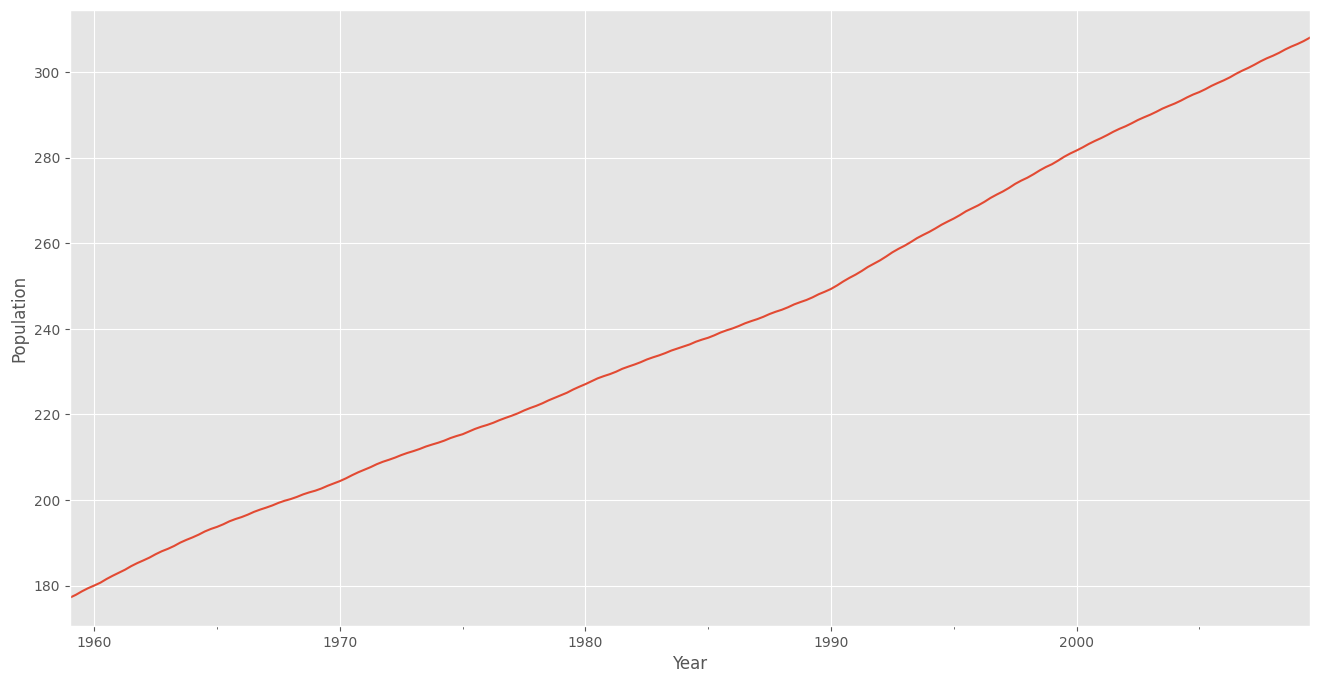

In [20]:
fig = plt.figure(figsize =(16,8))
ax = data["pop"].plot()
ax.set_ylabel("Population")
ax.set_xlabel("Year")

Text(0.5, 1.0, 'USA population growth')

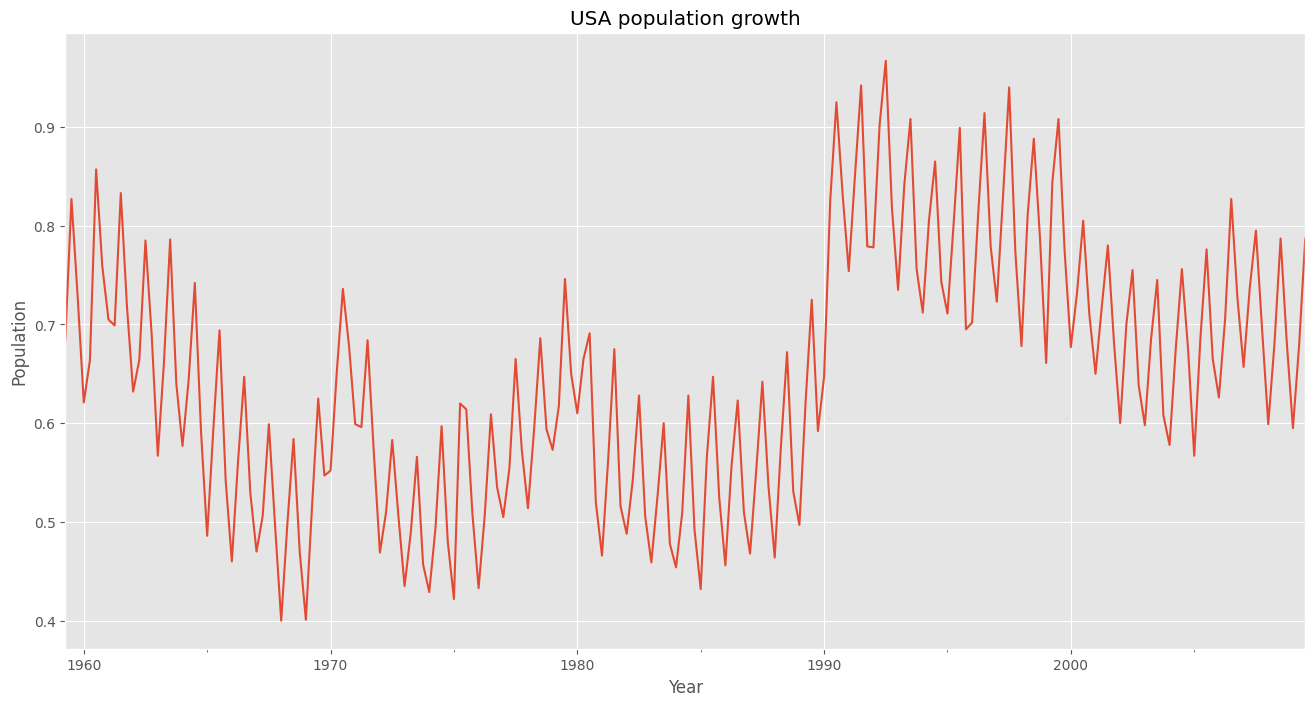

In [18]:
fig, ax = plt.subplots(figsize=(16,8))

ax = data.loc[:,'pop'].diff().dropna().plot()
ax.set_ylabel("Population")
ax.set_xlabel("Year")
ax.set_title("USA population growth")


As we can see there is 4 peaks, let's decompose it

STL Decomposition for population

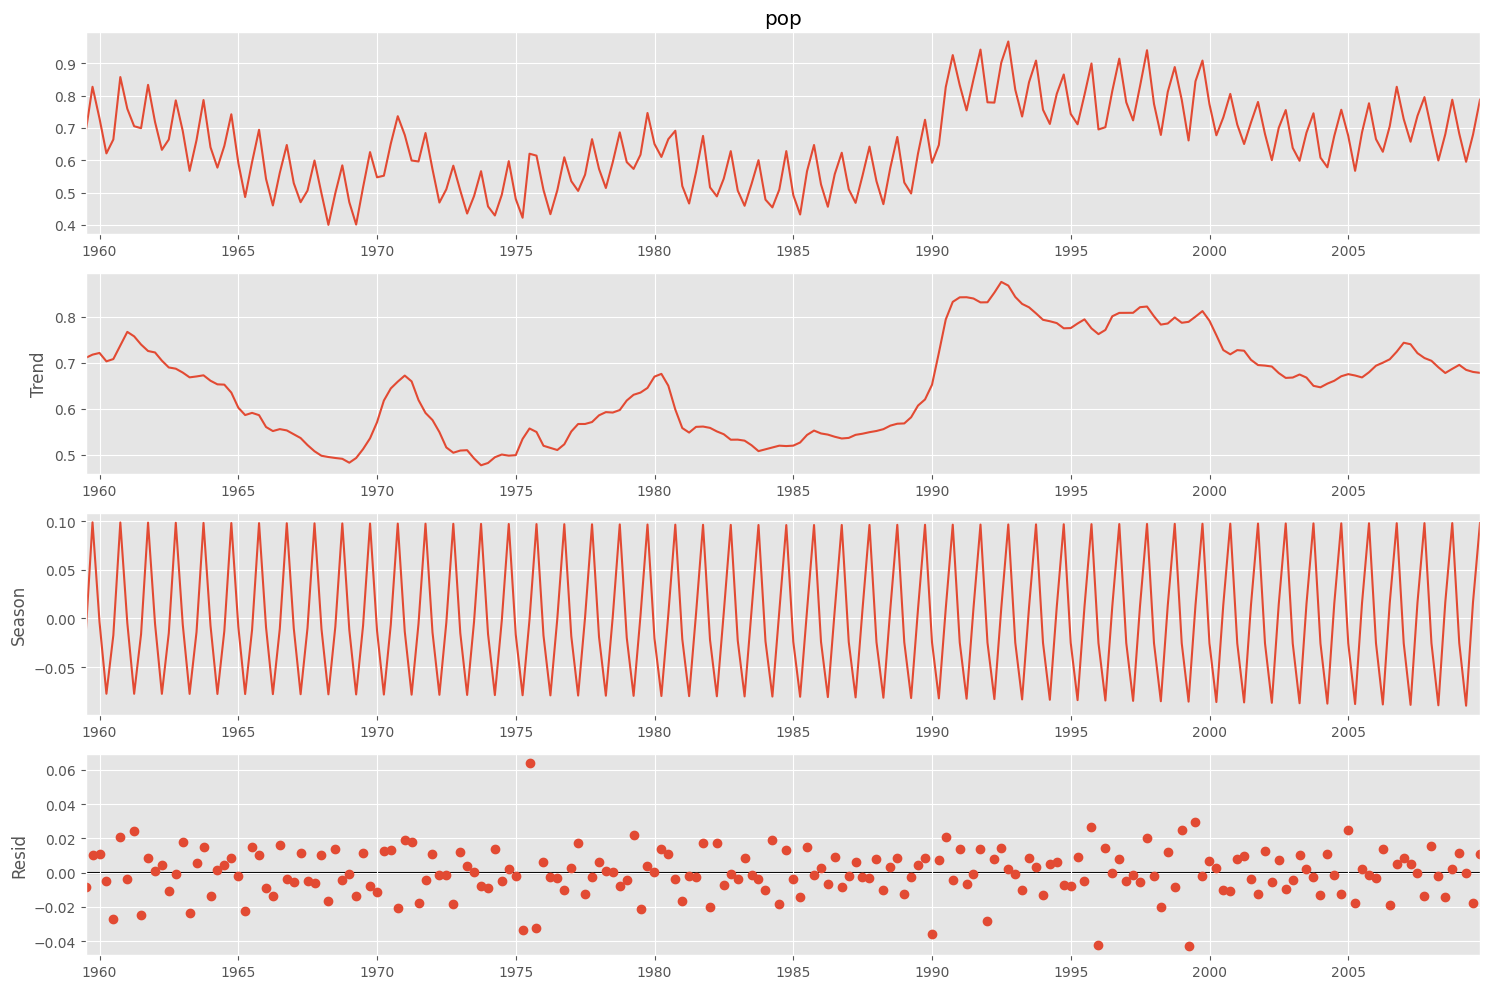

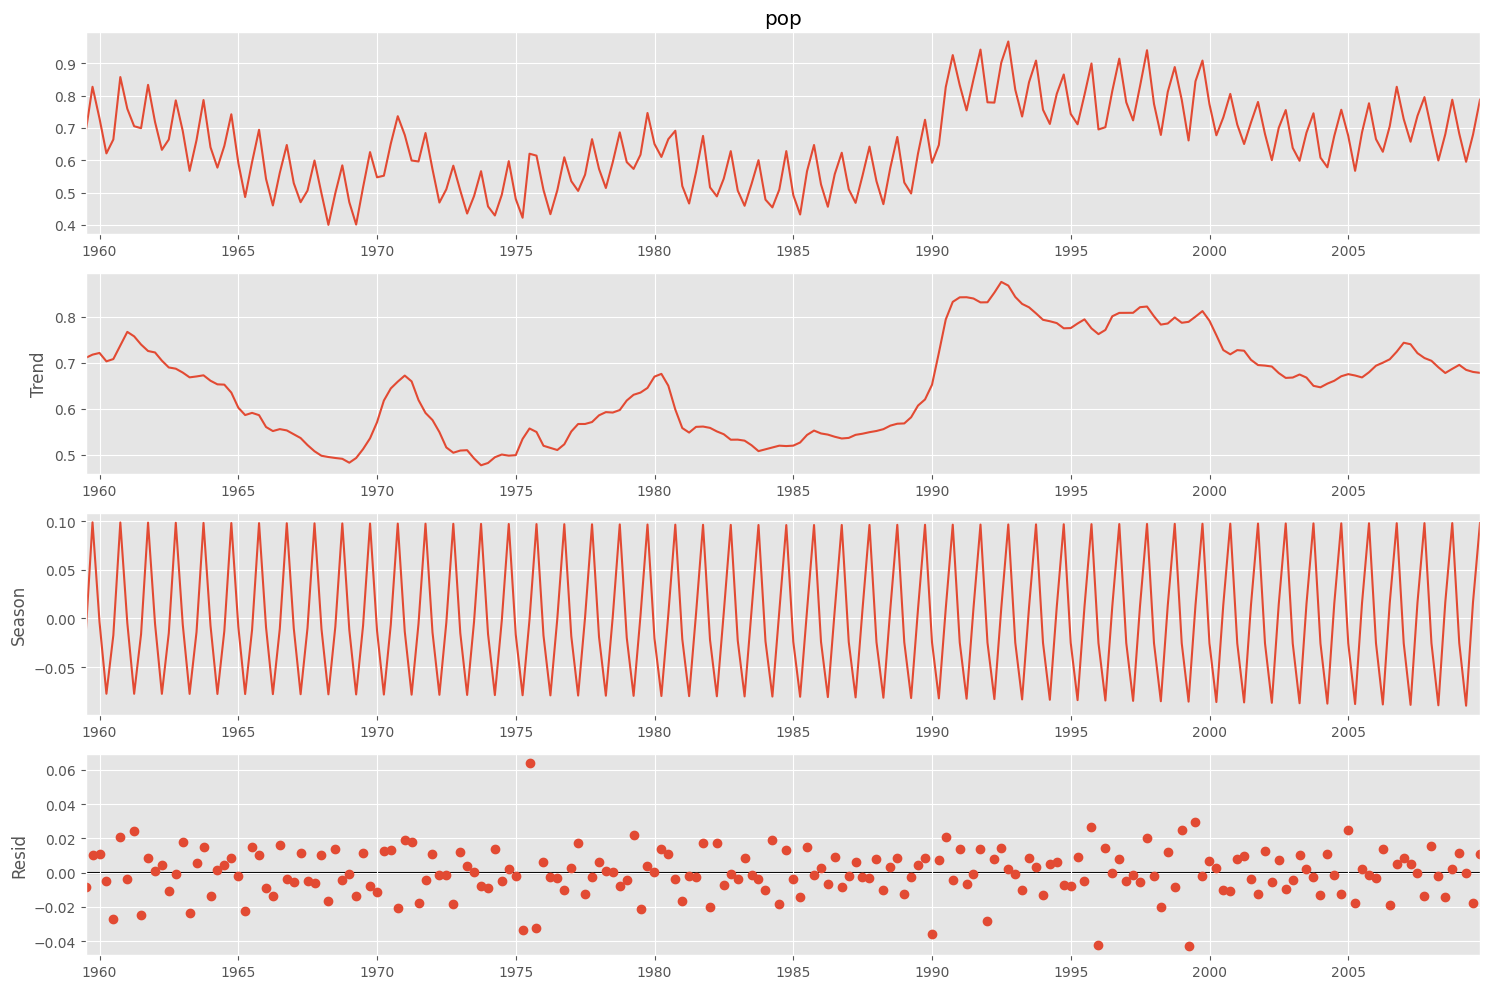

In [7]:
from statsmodels.tsa.seasonal import STL


stl = STL(data.loc[:,'pop'].diff().dropna(), trend=5, seasonal=61)
res = stl.fit()
res.plot()

Now lets plot correlations

In [22]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 12.5 MB/s eta 0:00:00


(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='pop'>, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

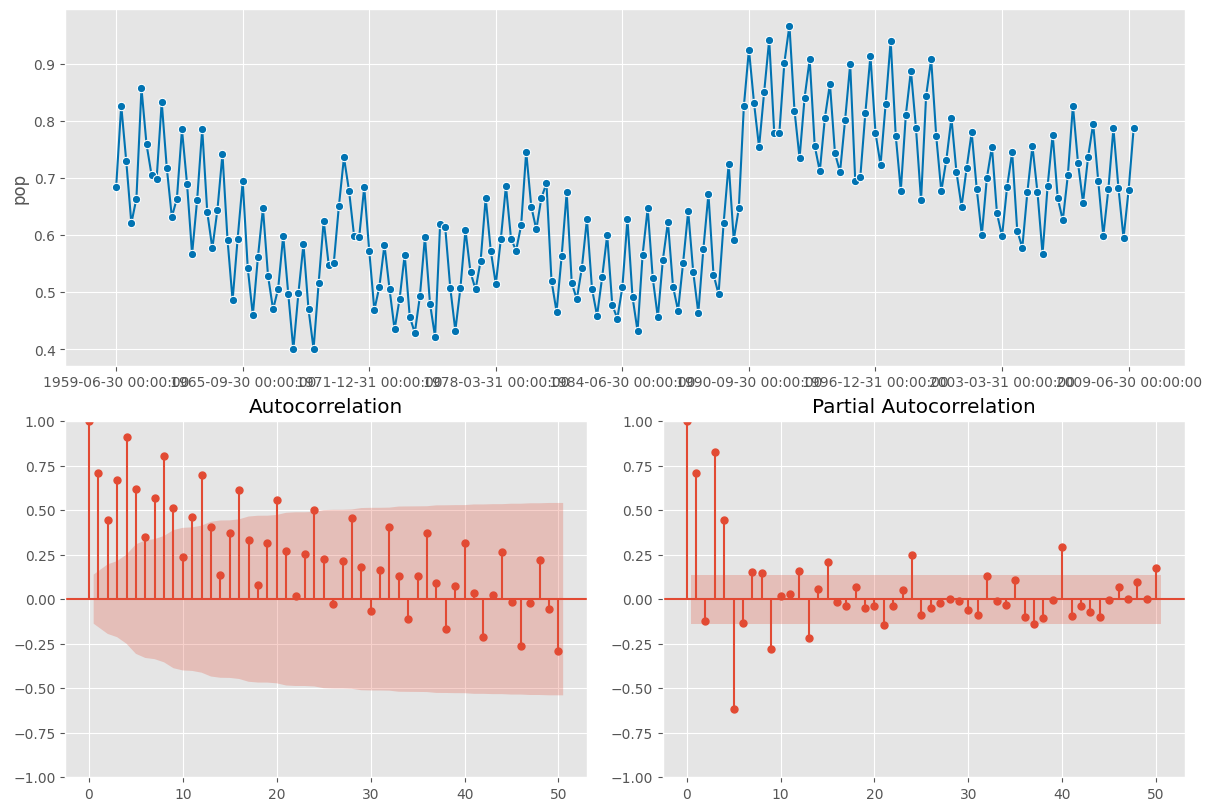

In [23]:
from sktime.utils.plotting import plot_correlations
plot_correlations(data.loc[:,'pop'].diff().dropna(), lags = 50 )